Перегляд 10 перших записів файлу

In [69]:
import pandas as pd

df = pd.read_csv('weather_data.csv')

print(df.head(10))

                 StationName                StationLocation  \
0         SpokaneSwingBridge  POINT (-122.351743 47.571389)   
1              NE45StViaduct   POINT (-122.301929 47.66127)   
2       AlbroPlaceAirportWay  POINT (-122.314114 47.547426)   
3       AlbroPlaceAirportWay  POINT (-122.314114 47.547426)   
4       AlbroPlaceAirportWay  POINT (-122.314114 47.547426)   
5       AlbroPlaceAirportWay  POINT (-122.314114 47.547426)   
6  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
7  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
8  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
9  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   

                 DateTime  RecordId  RoadSurfaceTemperature  AirTemperature  
0  09/18/2019 02:02:00 AM   3500793                   57.45           61.86  
1  09/18/2019 03:12:00 PM   3594561                   78.25           68.40  
2  09/17/2019 02:17:00 AM    451479                   18.76           27

Перегляд останніх 5 записів файлу

In [43]:
print(df.tail(5))

                   StationName               StationLocation  \
1249995  RooseveltWay_NE80thSt  POINT (-122.31765 47.692098)   
1249996  RooseveltWay_NE80thSt  POINT (-122.31765 47.692098)   
1249997  RooseveltWay_NE80thSt  POINT (-122.31765 47.692098)   
1249998  RooseveltWay_NE80thSt  POINT (-122.31765 47.692098)   
1249999  RooseveltWay_NE80thSt  POINT (-122.31765 47.692098)   

                       DateTime  RecordId  RoadSurfaceTemperature  \
1249995  08/26/2020 04:11:00 PM   4082547                    82.4   
1249996  08/26/2020 04:12:00 PM   4082548                    82.3   
1249997  08/26/2020 04:13:00 PM   4082549                    82.2   
1249998  08/26/2020 04:14:00 PM   4082550                    82.2   
1249999  08/26/2020 04:15:00 PM   4082551                    82.1   

         AirTemperature  
1249995            82.4  
1249996            82.3  
1249997            82.2  
1249998            82.2  
1249999            82.1  


Визначення кількості записів у файлі

In [44]:
print(len(df))

1250000


Визначення дискриптивних статистик для температури повітря

In [45]:
temperature_stats = df['AirTemperature'].describe()

number_of_records = temperature_stats['count']
mean_temp = temperature_stats['mean']
median_temp = temperature_stats['50%']
std_dev_temp = temperature_stats['std']
temp_range = temperature_stats['max'] - temperature_stats['min']

print("Математичне сподівання розподілу рівне {:.2f}".format(mean_temp))
print("Розмах ряду температур рівний {:.2f}".format(temp_range))
print("Медіана ряду температур рівна {:.2f}".format(median_temp))
print("Середньоквадратичне відхилення ряду температур рівне {:.2f}".format(std_dev_temp))

Математичне сподівання розподілу рівне 59.93
Розмах ряду температур рівний 123.74
Медіана ряду температур рівна 63.83
Середньоквадратичне відхилення ряду температур рівне 19.67


Відфільтрувати дані, які не входять до інтервалу
[m−σ; m+σ], де
m - математичне сподівання,
σ - середньоквадратичне відхилення.

In [46]:
lower_bound = mean_temp - std_dev_temp
upper_bound = mean_temp + std_dev_temp

filtered_data = df[(df['AirTemperature'] >= lower_bound) & (df['AirTemperature'] <= upper_bound)]

print("Кількість записів: ", len(filtered_data))
print(filtered_data)

Кількість записів:  955415
                       StationName                StationLocation  \
0               SpokaneSwingBridge  POINT (-122.351743 47.571389)   
1                    NE45StViaduct   POINT (-122.301929 47.66127)   
6        HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
7        HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
8        HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
...                            ...                            ...   
1249985       35thAveSW_SWMyrtleSt    POINT (-122.37658 47.53918)   
1249986       35thAveSW_SWMyrtleSt    POINT (-122.37658 47.53918)   
1249987       35thAveSW_SWMyrtleSt    POINT (-122.37658 47.53918)   
1249988       35thAveSW_SWMyrtleSt    POINT (-122.37658 47.53918)   
1249989       35thAveSW_SWMyrtleSt    POINT (-122.37658 47.53918)   

                       DateTime  RecordId  RoadSurfaceTemperature  \
0        09/18/2019 02:02:00 AM   3500793                   57.45   
1     

Додати нову серію даних, в якій температуру повітря перевести в градуси цельсія, округливши до цілого значення.

In [47]:
df['t_celsius'] = round((df['AirTemperature'] - 32) * 5/9)
print(df.head())

            StationName                StationLocation  \
0    SpokaneSwingBridge  POINT (-122.351743 47.571389)   
1         NE45StViaduct   POINT (-122.301929 47.66127)   
2  AlbroPlaceAirportWay  POINT (-122.314114 47.547426)   
3  AlbroPlaceAirportWay  POINT (-122.314114 47.547426)   
4  AlbroPlaceAirportWay  POINT (-122.314114 47.547426)   

                 DateTime  RecordId  RoadSurfaceTemperature  AirTemperature  \
0  09/18/2019 02:02:00 AM   3500793                   57.45           61.86   
1  09/18/2019 03:12:00 PM   3594561                   78.25           68.40   
2  09/17/2019 02:17:00 AM    451479                   18.76           27.24   
3  09/17/2019 02:18:00 AM    451480                   18.77           27.28   
4  09/17/2019 02:19:00 AM    451481                   18.78           27.30   

   t_celsius  
0       17.0  
1       20.0  
2       -3.0  
3       -3.0  
4       -3.0  


Підрахувати кількість кожного із значень градусів.

In [48]:
temperature_counts = df['t_celsius'].value_counts()
print(temperature_counts)

 18.0    86143
 17.0    85014
 16.0    77347
 15.0    75711
 19.0    72999
         ...  
-20.0      322
-19.0      258
 47.0      195
 9.0       106
 48.0       81
Name: t_celsius, Length: 62, dtype: int64


Побудувати діаграму частот варіаційного ряду

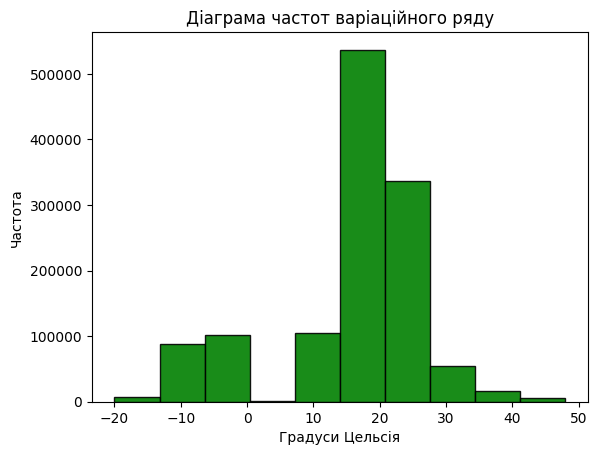

In [49]:
import matplotlib.pyplot as plt

plt.hist(df['t_celsius'], color='green', alpha=0.9, edgecolor='black')

plt.title('Діаграма частот варіаційного ряду')
plt.xlabel('Градуси Цельсія')
plt.ylabel('Частота')

# Виведення діаграми
plt.show()

Виділити дані зібрані на одній станції, наприклад HarborAveUpperNorthBridge

In [50]:
harbor_ave_data = df[df['StationName'] == 'HarborAveUpperNorthBridge']

print(harbor_ave_data)

                      StationName                StationLocation  \
6       HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
7       HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
8       HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
9       HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
10      HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
...                           ...                            ...   
318726  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
318728  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
318731  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
318734  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   
318737  HarborAveUpperNorthBridge  POINT (-122.370873 47.571695)   

                      DateTime  RecordId  RoadSurfaceTemperature  \
6       09/17/2019 02:16:00 AM   2546638                   60.22   
7       09/17/2019 02:17:00 AM   2546639       

Підрахувати кількість даних зібраних на кожній із станцій

In [51]:
station_counts = df['StationName'].value_counts()

print(station_counts)

RooseveltWay_NE80thSt        202398
35thAveSW_SWMyrtleSt         202312
NE45StViaduct                200549
AlbroPlaceAirportWay         196703
MagnoliaBridge               195158
AuroraBridge                 193781
HarborAveUpperNorthBridge     40727
SpokaneSwingBridge            18372
Name: StationName, dtype: int64


Побудувати scatterplot графік для дослідження зв'язку між температурою поверхні та температурою повітря

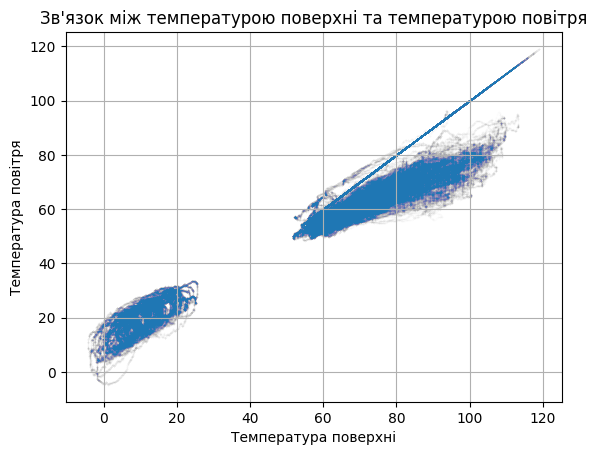

In [54]:

plt.scatter(df['RoadSurfaceTemperature'], df['AirTemperature'], s=1, alpha=0.003)
plt.title('Зв\'язок між температурою поверхні та температурою повітря')
plt.xlabel('Температура поверхні')
plt.ylabel('Температура повітря')
plt.grid(True)
plt.show()

Розрахувати коефіцієнт кореляції  між температурою поверхні та температурою повітря

In [55]:
correlation = df['RoadSurfaceTemperature'].corr(df['AirTemperature'])

print(correlation)


0.9523645165299339


Отже, між температурою поверхні та температурою повітря є дуже сильна позитивна кореляція.

Використовуючи бібліотеку seaborn побудувати heatmap

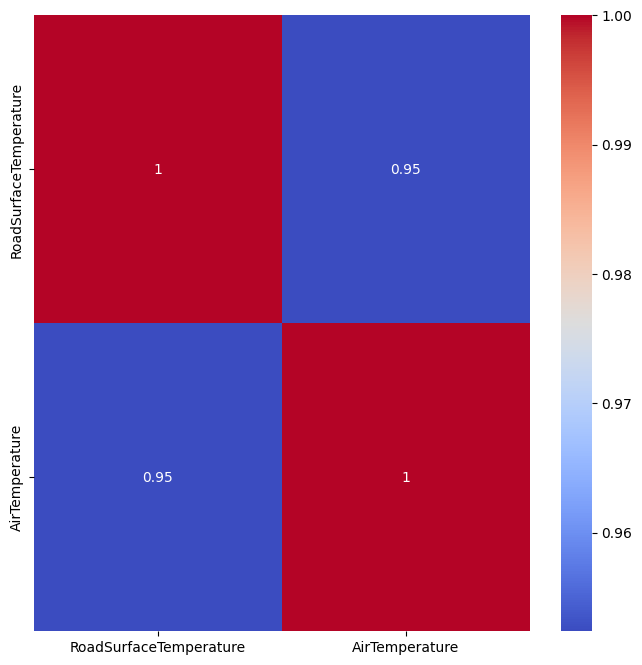

In [67]:
import seaborn as sns

temperature_data = df[['RoadSurfaceTemperature', 'AirTemperature']]

plt.figure(figsize=(8, 8))
sns.heatmap(temperature_data .corr(), annot=True, cmap='coolwarm')
plt.show()

Виділити із StationLocation довготу та широту станцій в 2 окремі стовпці

In [72]:
df_unique = df.drop_duplicates(subset=['StationName'])

def extract_coordinates(string):
    match = re.findall(r'-?\d+\.\d+', string)
    if match:
        return match

coordinates = df_unique['StationLocation'].apply(lambda x: pd.Series(extract_coordinates(x)))
coordinates.columns = ['Latitude', 'Longitude']
coordinates.insert(0, 'StationName', df_unique['StationName'].values)

coordinates.to_csv('station_coordinates.csv', index=False)

print(coordinates)

                   StationName     Latitude  Longitude
0           SpokaneSwingBridge  -122.351743  47.571389
1                NE45StViaduct  -122.301929   47.66127
2         AlbroPlaceAirportWay  -122.314114  47.547426
6    HarborAveUpperNorthBridge  -122.370873  47.571695
21       RooseveltWay_NE80thSt   -122.31765  47.692098
51        35thAveSW_SWMyrtleSt   -122.37658   47.53918
81              MagnoliaBridge  -122.387341  47.633454
102               AuroraBridge  -122.347278  47.643174


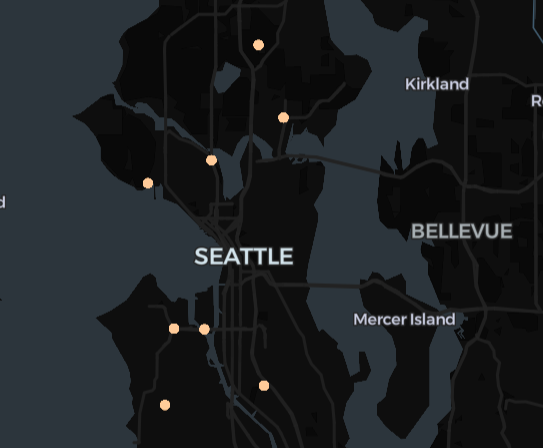